<a href="https://colab.research.google.com/github/LeeSeungYun1020/Introduction_To_Data_Science/blob/master/classroom/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data wrangling

## Data cleaning

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(48)
df = pd.DataFrame(10 * np.random.rand(4, 2).round(2), columns=["A", "B"])
df

,A,B
0,0.2,8.9
1,2.8,3.0
2,7.9,3.2
3,8.6,4.5


In [5]:
df.A[1] = np.nan
df

,A,B
0,0.2,8.9
1,NaN,3.0
2,7.9,3.2
3,8.6,4.5


In [6]:
df.isnull()

,A,B
0,False,False
1,True,False
2,False,False
3,False,False


In [7]:
df.isnull().sum()

A    1
B    0
dtype: int64

In [8]:
df.dropna()

,A,B
0,0.2,8.9
2,7.9,3.2
3,8.6,4.5


In [9]:
df.dropna(axis=1)

,B
0,8.9
1,3.0
2,3.2
3,4.5


In [10]:
df.dropna(how="all")
# all은 해당 행/열이 모두 NaN인 경우에 삭제

,A,B
0,0.2,8.9
1,NaN,3.0
2,7.9,3.2
3,8.6,4.5


In [11]:
df["B"][1] = np.nan
df

,A,B
0,0.2,8.9
1,NaN,NaN
2,7.9,3.2
3,8.6,4.5


In [12]:
df.dropna(how="all")

,A,B
0,0.2,8.9
2,7.9,3.2
3,8.6,4.5


In [13]:
df = pd.DataFrame([
                   [np.nan, np.nan, np.nan],
                   [1, np.nan, np.nan],
                   [2, 3, np.nan],
                   [4, 5, 6],
                   [np.nan, 7, 8],
])
df

,0,1,2
0,NaN,NaN,NaN
1,1.0,NaN,NaN
2,2.0,3.0,NaN
3,4.0,5.0,6.0
4,NaN,7.0,8.0


In [14]:
df.dropna()

,0,1,2
3,4.0,5.0,6.0


In [15]:
df.dropna(thresh=3, axis=1)

,0,1
0,NaN,NaN
1,1.0,NaN
2,2.0,3.0
3,4.0,5.0
4,NaN,7.0


In [16]:
np.random.seed(11)
df = pd.DataFrame(10 * np.random.rand(10, 3).round(2), columns=["A", "B", "C"])
idx = np.random.rand(10, 3) < 0.1
df[idx] = np.nan
df

,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,NaN,1.1
4,NaN,8.6,NaN
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,NaN,NaN
9,6.0,0.6,4.8


In [17]:
df.fillna(-1)

,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,-1.0,1.1
4,-1.0,8.6,-1.0
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,-1.0,-1.0
9,6.0,0.6,4.8


In [18]:
df.fillna(method="ffill") # 위에서 아래로

,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,4.9,1.1
4,8.5,8.6,1.1
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,3.4,3.2
9,6.0,0.6,4.8


In [19]:
print(df)
df.fillna(method="ffill", axis=1) # 왼쪽에서 오른쪽으로

     A    B    C
0  1.8  0.2  4.6
1  7.2  4.2  4.9
2  0.1  4.9  9.4
3  8.5  NaN  1.1
4  NaN  8.6  NaN
5  6.3  0.2  1.2
6  3.2  1.6  7.6
7  8.2  3.4  3.2
8  1.1  NaN  NaN
9  6.0  0.6  4.8


,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,8.5,1.1
4,NaN,8.6,8.6
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,1.1,1.1
9,6.0,0.6,4.8


In [20]:
print(df)
df.fillna(method="bfill", axis=1) # 오른쪽에서 왼쪽으로

     A    B    C
0  1.8  0.2  4.6
1  7.2  4.2  4.9
2  0.1  4.9  9.4
3  8.5  NaN  1.1
4  NaN  8.6  NaN
5  6.3  0.2  1.2
6  3.2  1.6  7.6
7  8.2  3.4  3.2
8  1.1  NaN  NaN
9  6.0  0.6  4.8


,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,1.1,1.1
4,8.6,8.6,NaN
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,NaN,NaN
9,6.0,0.6,4.8


In [21]:
dft = pd.DataFrame([[np.nan, np.nan, np.nan]], columns=["A", "B", "C"])
print(dft)
dft.fillna({"A": 1, "B": 2, "C": 3})

    A   B   C
0 NaN NaN NaN


,A,B,C
0,1.0,2.0,3.0


In [22]:
print(df)
print()
print(df.mean().round(1))
df.fillna(df.mean().round(1))

     A    B    C
0  1.8  0.2  4.6
1  7.2  4.2  4.9
2  0.1  4.9  9.4
3  8.5  NaN  1.1
4  NaN  8.6  NaN
5  6.3  0.2  1.2
6  3.2  1.6  7.6
7  8.2  3.4  3.2
8  1.1  NaN  NaN
9  6.0  0.6  4.8

A    4.7
B    3.0
C    4.6
dtype: float64


,A,B,C
0,1.8,0.2,4.6
1,7.2,4.2,4.9
2,0.1,4.9,9.4
3,8.5,3.0,1.1
4,4.7,8.6,4.6
5,6.3,0.2,1.2
6,3.2,1.6,7.6
7,8.2,3.4,3.2
8,1.1,3.0,4.6
9,6.0,0.6,4.8


## Data Scaling

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
np.random.seed(5)
n_samples = 1000
height = 4 * np.random.randn(n_samples).round(2) + 170
weight = 3 * np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw.head()

,height,weight
0,171.76,66.62
1,168.68,66.20
2,179.72,67.16
3,169.00,64.94
4,170.44,65.06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


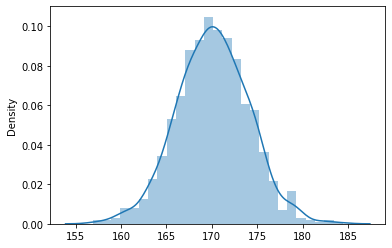

In [25]:
sns.distplot(df_raw["height"].values)

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df = df_raw.copy()
df[["h_scale", "w_scale"]] = scale.fit_transform(df[["height", "weight"]])
df

,height,weight,h_scale,w_scale
0,171.76,66.62,0.411016,0.556316
1,168.68,66.20,-0.366907,0.415903
2,179.72,67.16,2.421491,0.736847
3,169.00,64.94,-0.286084,-0.005336
4,170.44,65.06,0.077620,0.034782
...,...,...,...,...
995,173.20,69.17,0.774720,1.408824
996,173.08,66.86,0.744411,0.636552
997,169.80,67.10,-0.084026,0.716788
998,171.28,61.43,0.289781,-1.178787


In [27]:
scale.inverse_transform(df[["h_scale", "w_scale"]])

array([[171.76,  66.62],
       [168.68,  66.2 ],
       [179.72,  67.16],
       ...,
       [169.8 ,  67.1 ],
       [171.28,  61.43],
       [170.44,  54.47]])

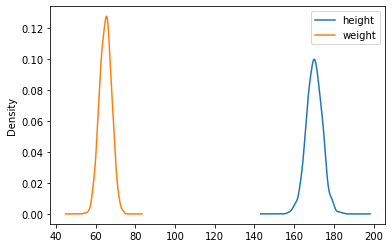

In [28]:
df[["height", "weight"]].plot.kde()

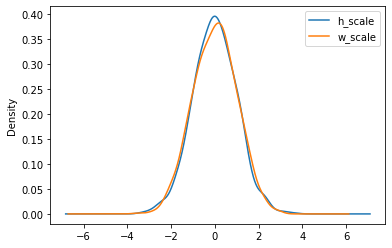

In [29]:
df[["h_scale", "w_scale"]].plot.kde()

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["h_scale", "w_scale"]] = scaler.fit_transform(df[["height", "weight"]])
df

,height,weight,h_scale,w_scale
0,171.76,66.62,0.539913,0.632813
1,168.68,66.20,0.428157,0.610938
2,179.72,67.16,0.828737,0.660938
3,169.00,64.94,0.439768,0.545313
4,170.44,65.06,0.492017,0.551563
...,...,...,...,...
995,173.20,69.17,0.592163,0.765625
996,173.08,66.86,0.587808,0.645313
997,169.80,67.10,0.468795,0.657812
998,171.28,61.43,0.522496,0.362500


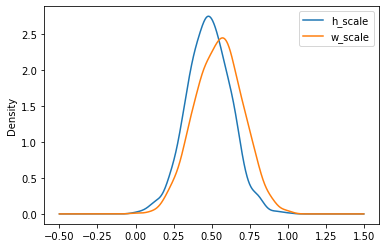

In [31]:
df[["h_scale", "w_scale"]].plot.kde()

이상치가 있는 경우
- min max scaler는 이상치에 영향 받음

In [32]:
st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
df = df_raw.copy()
df[["h_st", "w_st"]] = st_scaler.fit_transform(df[["height", "weight"]])
df[["h_mm", "w_mm"]] = mm_scaler.fit_transform(df[["height", "weight"]])

df["height1"] = height.copy()
df["height1"][0] = 200
df["weight1"] = weight.copy()
df["weight1"][0] = 80
df[["h1_st", "w1_st"]] = st_scaler.fit_transform(df[["height1", "weight1"]])
df[["h1_mm", "w1_mm"]] = mm_scaler.fit_transform(df[["height1", "weight1"]])
df[["height", "height1", "h_st", "h1_st", "h_mm", "h1_mm"]]

,height,height1,h_st,h1_st,h_mm,h1_mm
0,171.76,200.00,0.411016,7.331585,0.539913,1.000000
1,168.68,168.68,-0.366907,-0.363868,0.428157,0.273655
2,179.72,179.72,2.421491,2.348705,0.828737,0.529685
3,169.00,169.00,-0.286084,-0.285243,0.439768,0.281076
4,170.44,170.44,0.077620,0.068571,0.492017,0.314471
...,...,...,...,...,...,...
995,173.20,173.20,0.774720,0.746714,0.592163,0.378479
996,173.08,173.08,0.744411,0.717230,0.587808,0.375696
997,169.80,169.80,-0.084026,-0.088680,0.468795,0.299629
998,171.28,171.28,0.289781,0.274963,0.522496,0.333952


In [33]:
df[["weight", "weight1", "w_st", "w1_st", "w_mm", "w1_mm"]]

,weight,weight1,w_st,w1_st,w_mm,w1_mm
0,66.62,80.00,0.556316,4.963423,0.632813,1.000000
1,66.20,66.20,0.415903,0.406388,0.610938,0.459459
2,67.16,67.16,0.736847,0.723400,0.660938,0.497062
3,64.94,64.94,-0.005336,-0.009689,0.545313,0.410106
4,65.06,65.06,0.034782,0.029938,0.551563,0.414806
...,...,...,...,...,...,...
995,69.17,69.17,1.408824,1.387142,0.765625,0.575793
996,66.86,66.86,0.636552,0.624334,0.645313,0.485311
997,67.10,67.10,0.716788,0.703586,0.657812,0.494712
998,61.43,61.43,-1.178787,-1.168761,0.362500,0.272620


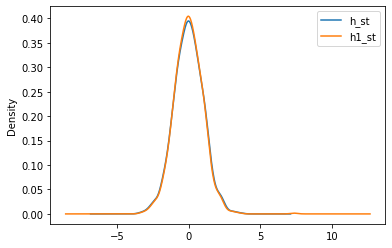

In [34]:
df[["h_st", "h1_st"]].plot.kde()

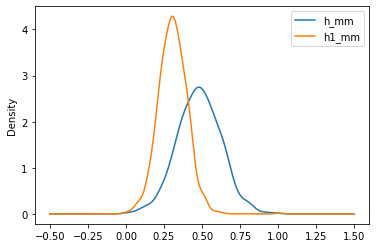

In [35]:
df[["h_mm", "h1_mm"]].plot.kde()

## Dealing with outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


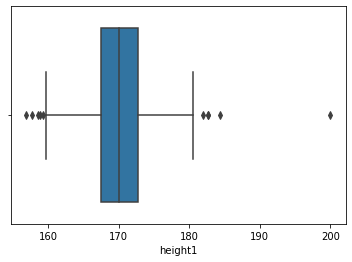

In [38]:
f = sns.boxplot(df["height1"])

In [39]:
df.shape

(1000, 12)

In [44]:
Q1 = df.height1.quantile(0.25)
Q3 = df.height1.quantile(0.75)
print(Q1, Q3)
IQR = Q3- Q1
lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

print(df.shape)
filtered = df.query("@lower <= height1 <= @higher")
print(filtered.shape)

167.52 172.81000000000003
(1000, 12)
(990, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


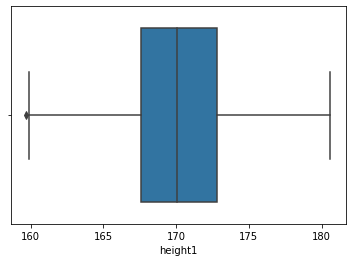

In [46]:
sns.boxplot(filtered.height1)

(1000, 12)
(994, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


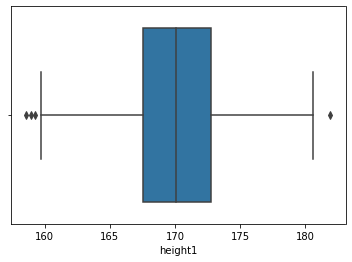

In [48]:
print(df.shape)
filtered = df.query("-3 <= h1_st <= 3")
print(filtered.shape)
sns.boxplot(filtered.height1)

## Data encoding

In [56]:
df.loc[df.h_st > 1, 'group'] = "tall"
df.loc[(df.h_st <= 1) & (df.h_st >= -1), 'group'] = "normal"
df.loc[df.h_st < -1, 'group'] = "short"
print("tallt\t", len(df[df.h_st > 1]))
print("normal\t", len(df[(df.h_st >= -1) & (df.h_st <= 1)]))
print("short\t", len(df[df.h_st < -1]))
print()
print(df.group.value_counts())
df.head()

tallt	 156
normal	 692
short	 152

normal    692
tall      156
short     152
Name: group, dtype: int64


,height,weight,h_st,w_st,h_mm,w_mm,height1,weight1,h1_st,w1_st,h1_mm,w1_mm,group
0,171.76,66.62,0.411016,0.556316,0.539913,0.632813,200.00,80.00,7.331585,4.963423,1.000000,1.000000,normal
1,168.68,66.20,-0.366907,0.415903,0.428157,0.610938,168.68,66.20,-0.363868,0.406388,0.273655,0.459459,normal
2,179.72,67.16,2.421491,0.736847,0.828737,0.660938,179.72,67.16,2.348705,0.723400,0.529685,0.497062,tall
3,169.00,64.94,-0.286084,-0.005336,0.439768,0.545313,169.00,64.94,-0.285243,-0.009689,0.281076,0.410106,normal
4,170.44,65.06,0.077620,0.034782,0.492017,0.551563,170.44,65.06,0.068571,0.029938,0.314471,0.414806,normal


In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["en"] = encoder.fit_transform(df.group)
df.head()

,height,weight,h_st,w_st,h_mm,w_mm,height1,weight1,h1_st,w1_st,h1_mm,w1_mm,group,en
0,171.76,66.62,0.411016,0.556316,0.539913,0.632813,200.00,80.00,7.331585,4.963423,1.000000,1.000000,normal,0
1,168.68,66.20,-0.366907,0.415903,0.428157,0.610938,168.68,66.20,-0.363868,0.406388,0.273655,0.459459,normal,0
2,179.72,67.16,2.421491,0.736847,0.828737,0.660938,179.72,67.16,2.348705,0.723400,0.529685,0.497062,tall,2
3,169.00,64.94,-0.286084,-0.005336,0.439768,0.545313,169.00,64.94,-0.285243,-0.009689,0.281076,0.410106,normal,0
4,170.44,65.06,0.077620,0.034782,0.492017,0.551563,170.44,65.06,0.068571,0.029938,0.314471,0.414806,normal,0


In [69]:
df_group = pd.get_dummies(df.group)
df_group.head()

,normal,short,tall
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [74]:
pd.concat((df, df_group), axis=1).head()

,height,weight,h_st,w_st,h_mm,w_mm,height1,weight1,h1_st,w1_st,h1_mm,w1_mm,group,en,normal,short,tall
0,171.76,66.62,0.411016,0.556316,0.539913,0.632813,200.00,80.00,7.331585,4.963423,1.000000,1.000000,normal,0,1,0,0
1,168.68,66.20,-0.366907,0.415903,0.428157,0.610938,168.68,66.20,-0.363868,0.406388,0.273655,0.459459,normal,0,1,0,0
2,179.72,67.16,2.421491,0.736847,0.828737,0.660938,179.72,67.16,2.348705,0.723400,0.529685,0.497062,tall,2,0,0,1
3,169.00,64.94,-0.286084,-0.005336,0.439768,0.545313,169.00,64.94,-0.285243,-0.009689,0.281076,0.410106,normal,0,1,0,0
4,170.44,65.06,0.077620,0.034782,0.492017,0.551563,170.44,65.06,0.068571,0.029938,0.314471,0.414806,normal,0,1,0,0


In [78]:
pd.concat((df, df_group), axis=1)[["height", "normal", "short", "tall"]].head()

,height,normal,short,tall
0,171.76,1,0,0
1,168.68,1,0,0
2,179.72,0,0,1
3,169.00,1,0,0
4,170.44,1,0,0
